### **Decision Tree Classification 🎄**
*Authored by: faeze abdoli, fatemeh hosseini*





In [1]:
# For working with data, loading, analysis and preprocessing
import pandas as pd

# To perform numerical calculations and work with arrays
import numpy as np

# To upload and download files in Google Colab
from google.colab import files

# For creating visualizations
from matplotlib import pyplot as plt

# For pretty-printing objects
import pprint

# To handle zip files
import zipfile

# For file and directory operations
import os

# For enhanced data visualization
import seaborn as sns

##Load the Data Salary Prediction 📉💰💸

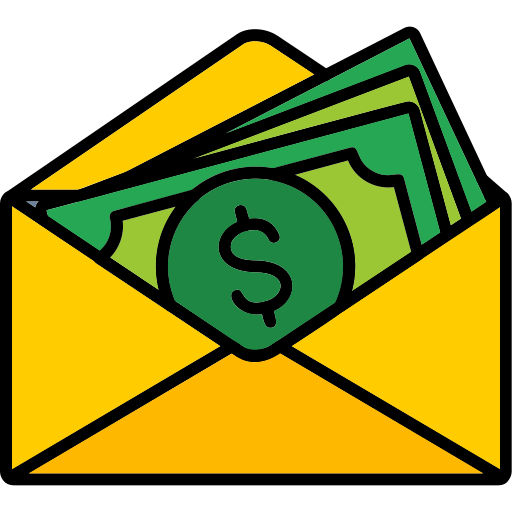

In [2]:
# If you are running this in Colab, uncomment and run the code.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download ayessa/salary-prediction-classification



cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification
License(s): unknown
  0% 0.00/460k [00:00<?, ?B/s]
100% 460k/460k [00:00<00:00, 31.1MB/s]


In [3]:
# If you are running this in Colab, uncomment and run the code.
with zipfile.ZipFile('salary-prediction-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/salary')

In [4]:
data = pd.read_csv('/content/salary/salary.csv')

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##Preprocess the Data

In [6]:
print("\nUnique Data in Each Column:")
print("*******************")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column}: {len(unique_values)} unique values")
    print(unique_values)
    print("=======================================")



Unique Data in Each Column:
*******************
age: 73 unique values
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass: 9 unique values
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt: 21648 unique values
[ 77516  83311 215646 ...  34066  84661 257302]
education: 16 unique values
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num: 16 unique values
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status: 7 unique values
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: 15 unique 

# Dataset Summary

This dataset provides insights into various features, likely representing demographic and financial attributes of individuals. Here’s an analysis of the columns and their unique values.

## Columns and Unique Values
Each column lists the number of unique values, indicating the level of variability in each feature:

- **Continuous Features**: Columns like `age`, `fnlwgt`, `capital-gain`, `capital-loss`, and `hours-per-week` show a high number of unique values, reflecting a wide range of data.
- **Categorical Features**: Columns like `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, `native-country`, and `salary` have fewer unique values, indicating specific categories or classes.

## Understanding of Each Column

- **`age`**: Contains various age values, indicating this is likely a demographic variable for individuals in the dataset.
- **`workclass`**: Lists employment categories, with values like "Private," "Self-employed," and some missing data marked with a "?". This likely reflects the type of employer or employment status.
- **`fnlwgt`**: Appears to be a weight or identifier specific to individuals, showing many unique values, which might indicate it's a continuous or unique identifier used for sampling purposes.
- **`education` and `education-num`**: Two columns associated with education level, with `education-num` potentially encoding the number of years or a numerical level corresponding to `education`.
- **`marital-status`**: Shows categories describing relationship or marriage status.
- **`occupation`**: Lists job categories, including a few missing values ("?"), which could indicate gaps in the data.
- **`relationship`**: Shows familial or household relationships, likely providing social or household structure data.
- **`race`** and **`sex`**: Both demographic indicators.
- **`capital-gain` and `capital-loss`**: Represent financial information, showing various income amounts with a range of values and some zeros.
- **`hours-per-week`**: Likely reflects working hours, with varied values indicating part-time to full-time and potentially overtime work.
- **`native-country`**: Lists different countries, with some missing values ("?"), indicating the individual’s origin or nationality.
- **`salary`**: A binary target variable ("<=50K" and ">50K") that could indicate income level.

## Missing Values
The columns `workclass`, `occupation`, and `native-country` contain "?" symbols, often used to denote missing or unknown data. This may require handling through data cleaning or imputation.


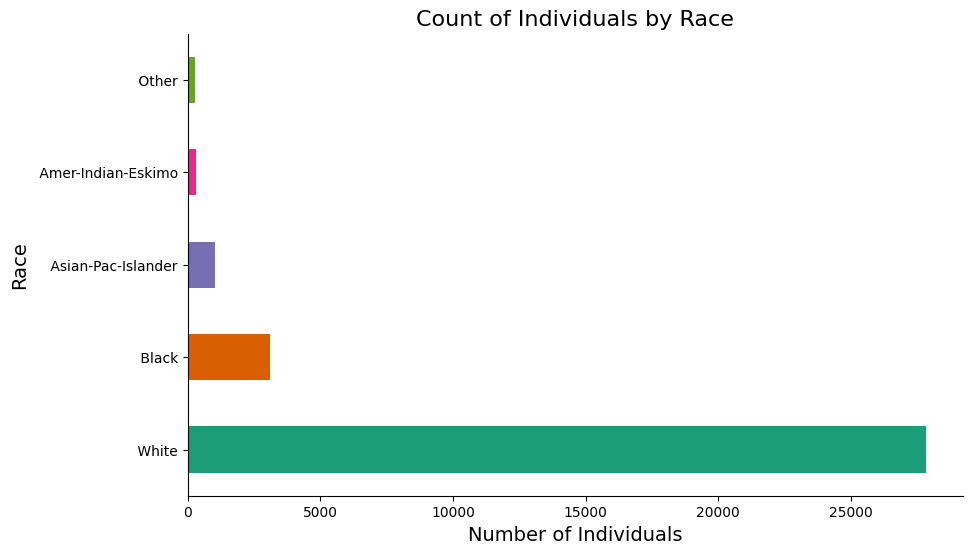

In [9]:
race_counts = data['race'].value_counts()

# Setting figure size and adding color palette
race_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(race_counts)), figsize=(10, 6))

plt.title('Count of Individuals by Race', fontsize=16)
plt.xlabel('Number of Individuals', fontsize=14)
plt.ylabel('Race', fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


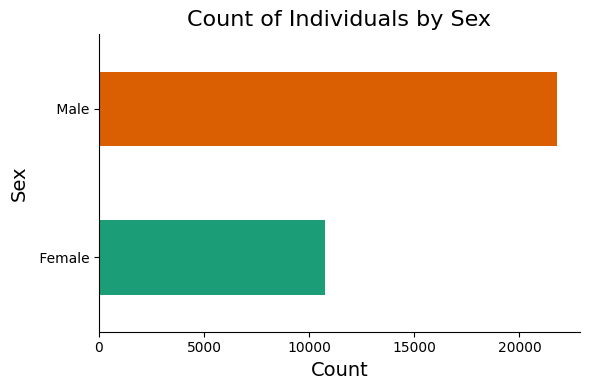

In [12]:
sex_counts = data.groupby('sex').size()
sns.set_palette('Dark2')
sex_counts.plot(kind='barh', color=sns.color_palette(), figsize=(6, 4))
plt.title('Count of Individuals by Sex', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Sex', fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

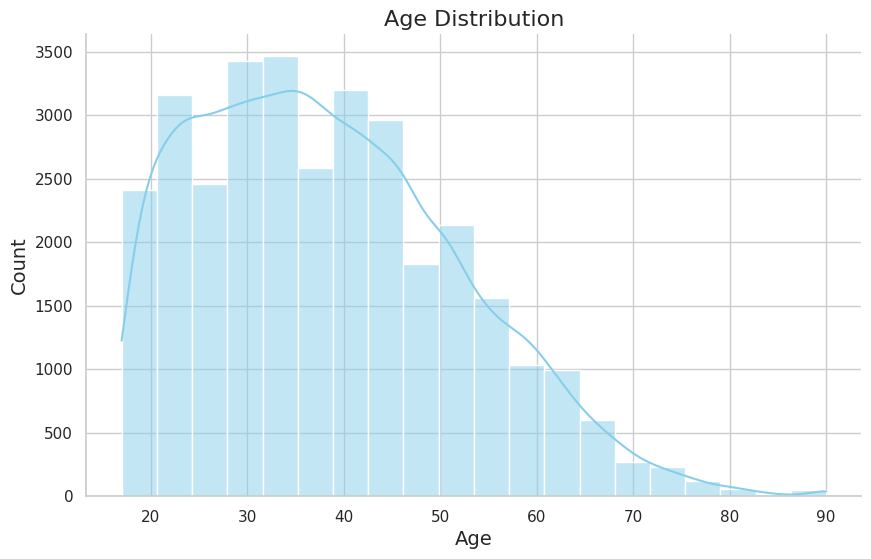

In [26]:
# if you want plot an other feature , lets do it :)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color="skyblue")
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

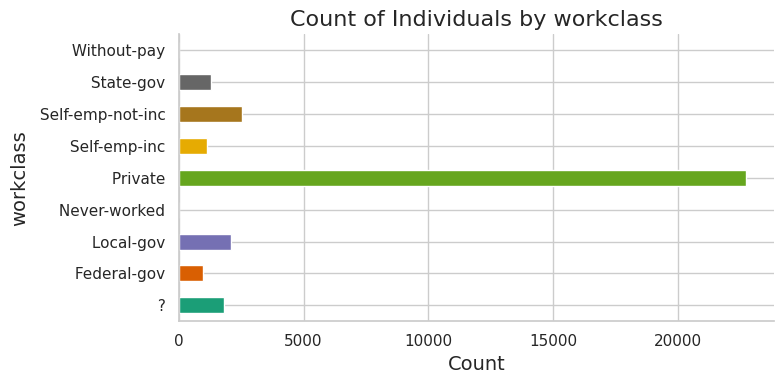

___________________________________________________


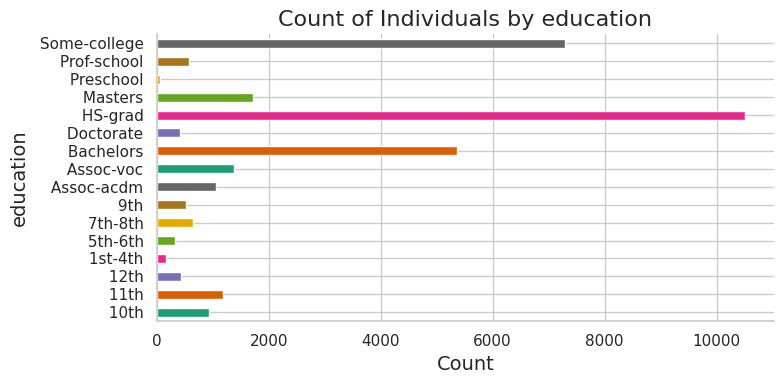

___________________________________________________


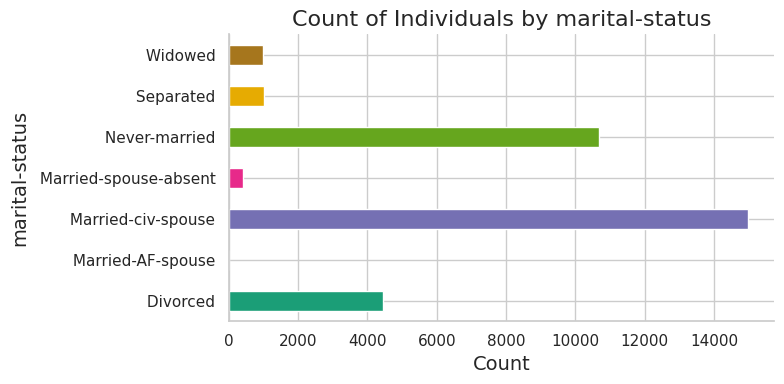

___________________________________________________


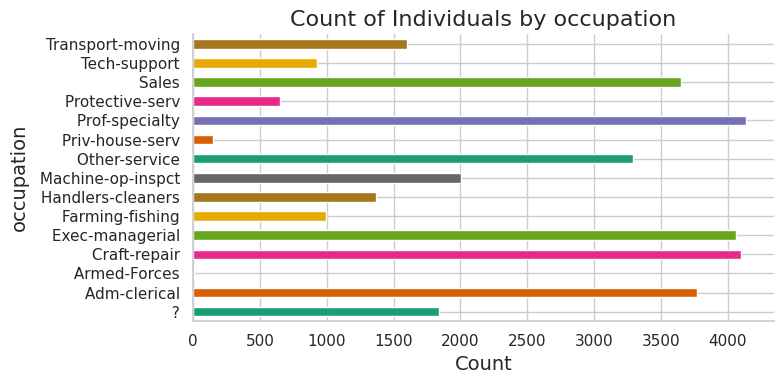

___________________________________________________


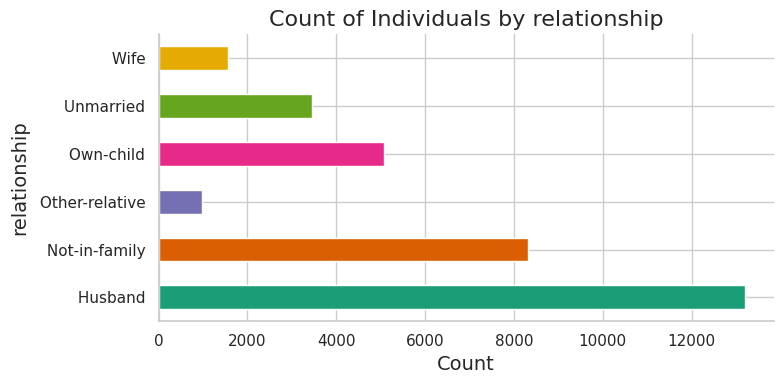

___________________________________________________


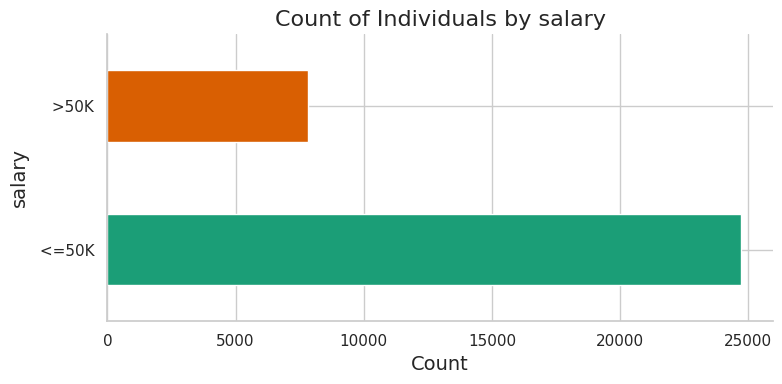

___________________________________________________


In [44]:
# if you want plot an other feature , lets do it :)
for feature in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'salary']:
  feature_counts = data.groupby(feature).size()
  sns.set_palette('Dark2')
  feature_counts.plot(kind='barh', color=sns.color_palette(), figsize=(8 , 4))
  plt.title('Count of Individuals by ' + feature, fontsize=16)
  plt.xlabel('Count', fontsize=14)
  plt.ylabel(feature , fontsize=14)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  plt.show()
  print("___________________________________________________")

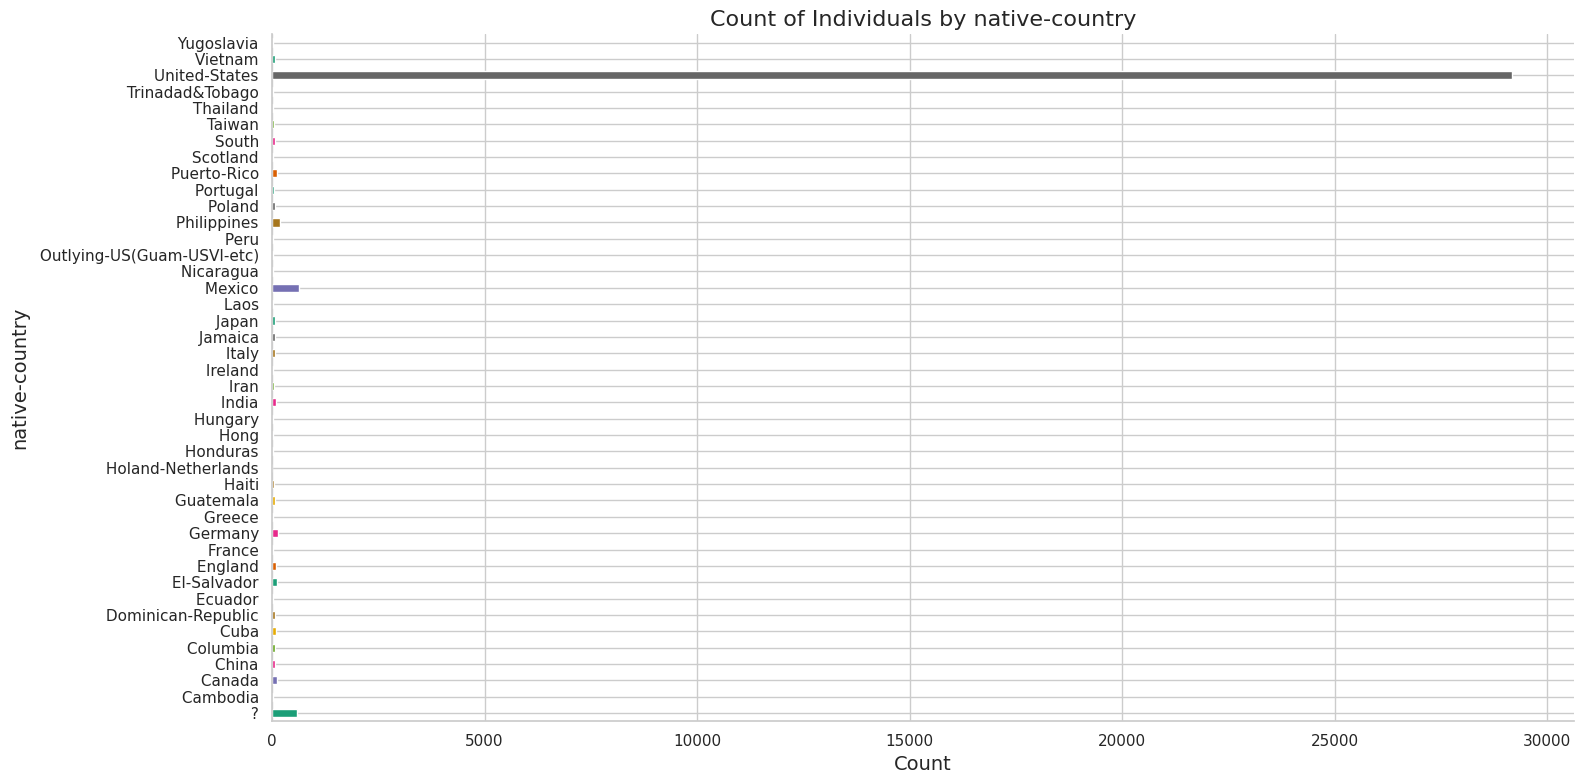

In [43]:
native_country_counts = data.groupby('native-country').size()
sns.set_palette('Dark2')
native_country_counts.plot(kind='barh', color=sns.color_palette(), figsize=(16, 8))
plt.title('Count of Individuals by native-country', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('native-country', fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

### Categorization of  features

In [5]:
"""For instance, when it comes to age, we want to create categories because there are too many individual values.
                     We can categorize ages into groups such as 1-30, 31-50, and over 50"""
age_bins = [0, 30, 50, 100]  # Bin edges
age_labels = ['1-30', '31-50', '51+']  # Labels for the bins
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

In [6]:
data = data.drop(columns=['age'])

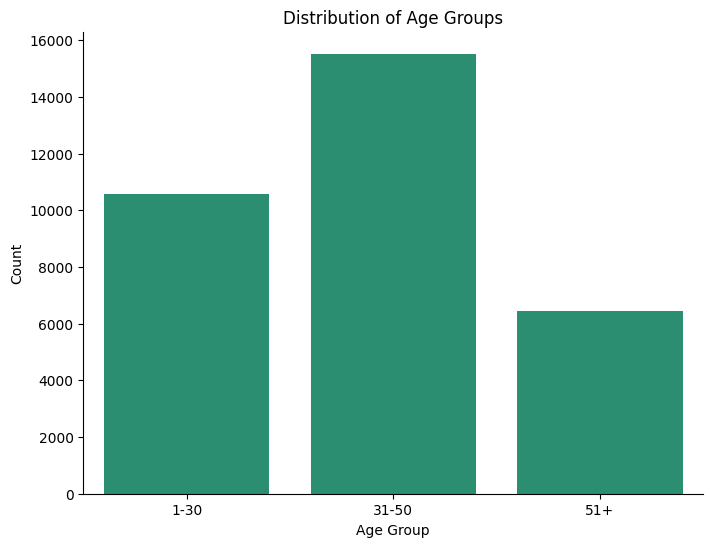

In [10]:
# Plot the distribution of age groups
plt.figure(figsize=(8, 6))
sns.set_palette('Dark2')
sns.countplot(data=data, x='age_group')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [7]:
# an other feature we want to Categorization
hours_bins = [0, 30, 40, 100]
hours_labels = ['Part-time', 'Full-time', 'Overtime']
data['hours_per_week_group'] = pd.cut(data['hours-per-week'], bins=hours_bins, labels=hours_labels)

In [8]:
data = data.drop(columns=['hours-per-week'])

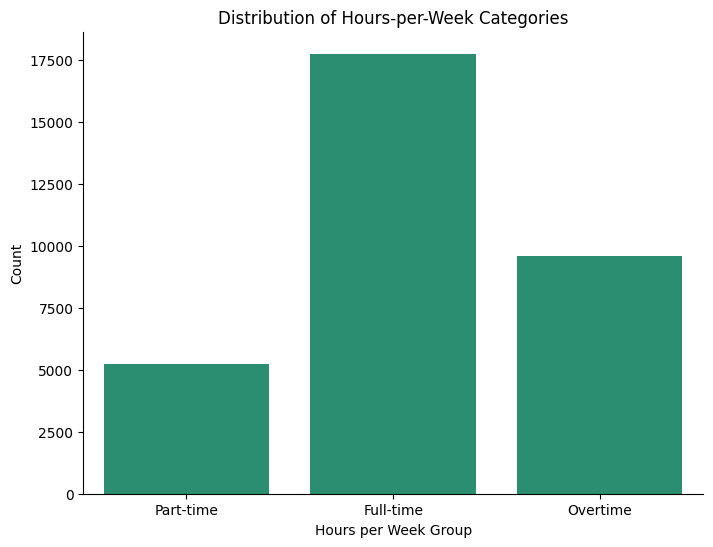

In [12]:
# Plot the distribution of hours-per-week categories
plt.figure(figsize=(8, 6))
sns.set_palette('Dark2')
sns.countplot(data=data, x='hours_per_week_group')
plt.title('Distribution of Hours-per-Week Categories')
plt.xlabel('Hours per Week Group')
plt.ylabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [9]:
# Define bins and labels for capital-gain
capital_gain_bins = [-1, 0, 5000, 15000, float('inf')]
capital_gain_labels = ['No Gain', 'Low Gain', 'Medium Gain', 'High Gain']

# Create a new column for capital-gain categories
data['capital_gain_group'] = pd.cut(data['capital-gain'], bins=capital_gain_bins, labels=capital_gain_labels)
data = data.drop(columns=['capital-gain'])

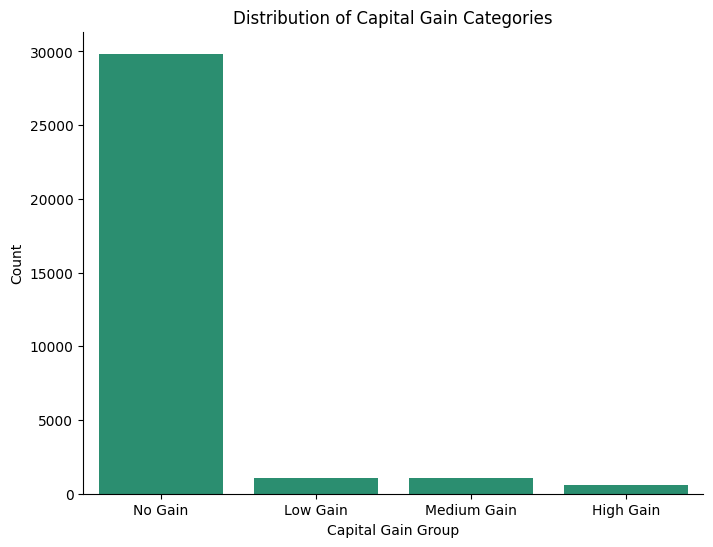

In [15]:
plt.figure(figsize=(8, 6))
sns.set_palette('Dark2')
sns.countplot(data=data, x='capital_gain_group')
plt.title('Distribution of Capital Gain Categories')
plt.xlabel('Capital Gain Group')
plt.ylabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [10]:
# Define bins and labels for capital-loss
capital_loss_bins = [-1, 0, 1000, 2000, float('inf')]  # Bin edges, -1 ensures 0 goes into "No Loss"
capital_loss_labels = ['No Loss', 'Low Loss', 'Medium Loss', 'High Loss']  # Labels for the bins

# Create a new column for capital-loss categories
data['capital_loss_group'] = pd.cut(data['capital-loss'], bins=capital_loss_bins, labels=capital_loss_labels)
data = data.drop(columns=['capital-loss'])

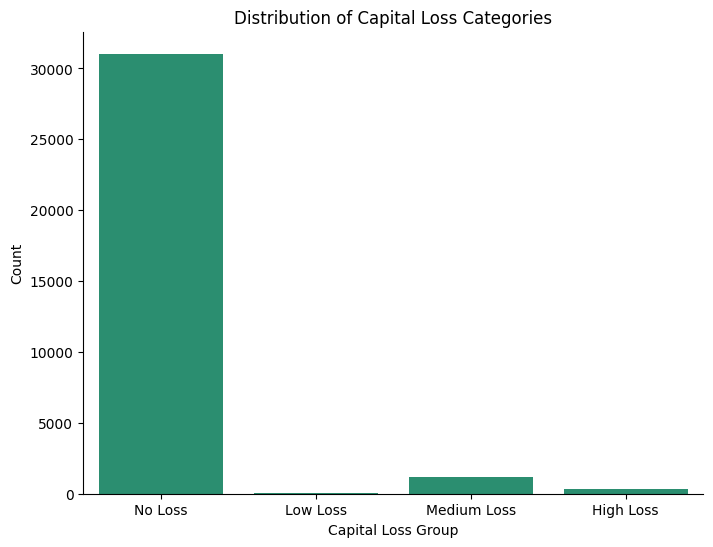

In [17]:
plt.figure(figsize=(8, 6))
sns.set_palette('Dark2')
sns.countplot(data=data, x='capital_loss_group')
plt.title('Distribution of Capital Loss Categories')
plt.xlabel('Capital Loss Group')
plt.ylabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [13]:
data.head()

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,salary,age_group,hours_per_week_group,capital_gain_group,capital_loss_group
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,31-50,Full-time,Low Gain,No Loss
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,31-50,Part-time,No Gain,No Loss
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,31-50,Full-time,No Gain,No Loss
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,51+,Full-time,No Gain,No Loss
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,1-30,Full-time,No Gain,No Loss


## Dropping Unnecessary Features

we will refine our dataset by removing features that do not contribute to our analysis. Irrelevant features can introduce noise and negatively impact the performance of our decision tree model. By eliminating redundant or insignificant features, we can create a cleaner dataset that improves accuracy and interpretability in predicting salary outcomes.

In [11]:
data.drop(["fnlwgt"],axis='columns',inplace=True)
data.drop(["education-num"],axis='columns',inplace=True)

In [15]:
data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary,age_group,hours_per_week_group,capital_gain_group,capital_loss_group
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,31-50,Full-time,Low Gain,No Loss
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,31-50,Part-time,No Gain,No Loss
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,31-50,Full-time,No Gain,No Loss
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,51+,Full-time,No Gain,No Loss
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,1-30,Full-time,No Gain,No Loss


# Handle Missing Values 😀

In [29]:
# Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   workclass             32561 non-null  object  
 1   education             32561 non-null  object  
 2   marital-status        32561 non-null  object  
 3   occupation            32561 non-null  object  
 4   relationship          32561 non-null  object  
 5   race                  32561 non-null  object  
 6   sex                   32561 non-null  object  
 7   native-country        32561 non-null  object  
 8   salary                32561 non-null  object  
 9   age_group             32561 non-null  category
 10  hours_per_week_group  32561 non-null  category
 11  capital_gain_group    32561 non-null  category
 12  capital_loss_group    32561 non-null  category
dtypes: category(4), object(9)
memory usage: 2.4+ MB


In [49]:
# Count the occurrences of '?' in each of the specified columns
workclass_missing = data['workclass'].value_counts().get(' ?', 0)
occupation_missing = data['occupation'].value_counts().get(' ?', 0)
native_country_missing = data['native-country'].value_counts().get(' ?', 0)

# Display the counts
print(f"Number of '?' in workclass: {workclass_missing}")
print(f"Number of '?' in occupation: {occupation_missing}")
print(f"Number of '?' in native-country: {native_country_missing}")

Number of '?' in workclass: 1836
Number of '?' in occupation: 1843
Number of '?' in native-country: 583


In [12]:
# Replace '?' with the most frequent value in each column
data['workclass'] = data['workclass'].replace(' ?', data['workclass'].mode()[0])
data['occupation'] = data['occupation'].replace(' ?', data['occupation'].mode()[0])
data['native-country'] = data['native-country'].replace(' ?', data['native-country'].mode()[0])

In [13]:
# Count the occurrences of '?' in each of the specified columns
workclass_missing = data['workclass'].value_counts().get(' ?', 0)
occupation_missing = data['occupation'].value_counts().get(' ?', 0)
native_country_missing = data['native-country'].value_counts().get(' ?', 0)

# Display the counts
print(f"Number of '?' in workclass: {workclass_missing}")
print(f"Number of '?' in occupation: {occupation_missing}")
print(f"Number of '?' in native-country: {native_country_missing}")

Number of '?' in workclass: 0
Number of '?' in occupation: 0
Number of '?' in native-country: 0


# Encode Categorical Variables 🙄

In [18]:
# One-hot encode selected categorical columns
data_one_hot = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country' , 'age_group', 'hours_per_week_group', 'capital_gain_group', 'capital_loss_group' ], drop_first=True)

In [61]:
data_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 102 entries, salary to capital_loss_group_High Loss
dtypes: bool(101), object(1)
memory usage: 3.4+ MB


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   workclass             32561 non-null  object  
 1   education             32561 non-null  object  
 2   marital-status        32561 non-null  object  
 3   occupation            32561 non-null  object  
 4   relationship          32561 non-null  object  
 5   race                  32561 non-null  object  
 6   sex                   32561 non-null  object  
 7   native-country        32561 non-null  object  
 8   salary                32561 non-null  object  
 9   age_group             32561 non-null  category
 10  hours_per_week_group  32561 non-null  category
 11  capital_gain_group    32561 non-null  category
 12  capital_loss_group    32561 non-null  category
dtypes: category(4), object(9)
memory usage: 2.4+ MB


In [19]:
data_one_hot.head()

,salary,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,age_group_31-50,age_group_51+,hours_per_week_group_Full-time,hours_per_week_group_Overtime,capital_gain_group_Low Gain,capital_gain_group_Medium Gain,capital_gain_group_High Gain,capital_loss_group_Low Loss,capital_loss_group_Medium Loss,capital_loss_group_High Loss
0,<=50K,False,False,False,False,False,True,False,False,False,...,True,False,True,False,True,False,False,False,False,False
1,<=50K,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,<=50K,False,False,True,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
3,<=50K,False,False,True,False,False,False,False,True,False,...,False,True,True,False,False,False,False,False,False,False
4,<=50K,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [14]:
from sklearn.preprocessing import LabelEncoder
encoded_data = data.copy()
for col in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country' , 'age_group', 'hours_per_week_group', 'capital_gain_group', 'capital_loss_group']:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])


In [20]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   workclass             32561 non-null  int64 
 1   education             32561 non-null  int64 
 2   marital-status        32561 non-null  int64 
 3   occupation            32561 non-null  int64 
 4   relationship          32561 non-null  int64 
 5   race                  32561 non-null  int64 
 6   sex                   32561 non-null  int64 
 7   native-country        32561 non-null  int64 
 8   salary                32561 non-null  object
 9   age_group             32561 non-null  int64 
 10  hours_per_week_group  32561 non-null  int64 
 11  capital_gain_group    32561 non-null  int64 
 12  capital_loss_group    32561 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 3.2+ MB


In [21]:
encoded_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary,age_group,hours_per_week_group,capital_gain_group,capital_loss_group
0,6,9,4,0,1,4,1,38,<=50K,1,0,1,3
1,5,9,2,3,0,4,1,38,<=50K,1,2,3,3
2,3,11,0,5,1,4,1,38,<=50K,1,0,3,3
3,3,1,2,5,0,2,1,38,<=50K,2,0,3,3
4,3,9,2,9,5,2,0,4,<=50K,0,0,3,3


In [22]:
from sklearn.preprocessing import OrdinalEncoder
encoded_data2 = data.copy()

label_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for col in label_cols:
    le = LabelEncoder()
    encoded_data2[col] = le.fit_transform(encoded_data2[col])

ordinal_cols = ['age_group', 'hours_per_week_group', 'capital_gain_group', 'capital_loss_group']
oe = OrdinalEncoder()
encoded_data2[ordinal_cols] = oe.fit_transform(encoded_data2[ordinal_cols])

In [86]:
encoded_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   workclass             32561 non-null  int64  
 1   education             32561 non-null  int64  
 2   marital-status        32561 non-null  int64  
 3   occupation            32561 non-null  int64  
 4   relationship          32561 non-null  int64  
 5   race                  32561 non-null  int64  
 6   sex                   32561 non-null  int64  
 7   native-country        32561 non-null  int64  
 8   salary                32561 non-null  object 
 9   age_group             32561 non-null  float64
 10  hours_per_week_group  32561 non-null  float64
 11  capital_gain_group    32561 non-null  float64
 12  capital_loss_group    32561 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 3.2+ MB


In [23]:
encoded_data2.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary,age_group,hours_per_week_group,capital_gain_group,capital_loss_group
0,6,9,4,0,1,4,1,38,<=50K,1.0,0.0,1.0,3.0
1,5,9,2,3,0,4,1,38,<=50K,1.0,2.0,3.0,3.0
2,3,11,0,5,1,4,1,38,<=50K,1.0,0.0,3.0,3.0
3,3,1,2,5,0,2,1,38,<=50K,2.0,0.0,3.0,3.0
4,3,9,2,9,5,2,0,4,<=50K,0.0,0.0,3.0,3.0


In [87]:
print("\nUnique Data in Each Column:")
print("*******************")
for column in encoded_data2.columns:
    unique_values = encoded_data2[column].unique()
    print(f"{column}: {len(unique_values)} unique values")
    print(unique_values)
    print("=======================================")



Unique Data in Each Column:
*******************
workclass: 8 unique values
[6 5 3 0 1 4 7 2]
education: 16 unique values
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
marital-status: 7 unique values
[4 2 0 3 5 1 6]
occupation: 14 unique values
[ 0  3  5  9  7 11  2 13  4  6 12 10  1  8]
relationship: 6 unique values
[1 0 5 3 4 2]
race: 5 unique values
[4 2 1 0 3]
sex: 2 unique values
[1 0]
native-country: 41 unique values
[38  4 22 18 25 34 32 15  8  1 10 19 29 21 30  3  0 36  6 24 35 13 31  5
  7  9 12  2 23 40 28 27 33 37 11 26 39 16 20 17 14]
salary: 2 unique values
[' <=50K' ' >50K']
age_group: 3 unique values
[1. 2. 0.]
hours_per_week_group: 3 unique values
[0. 2. 1.]
capital_gain_group: 4 unique values
[1. 3. 2. 0.]
capital_loss_group: 4 unique values
[3. 0. 2. 1.]


In [67]:
print(data['salary'].unique())

[' <=50K' ' >50K']


## Convert Target Variable to Numerical

In [24]:
# Remove leading/trailing spaces from salary values
data_one_hot['salary'] = data_one_hot['salary'].str.strip()

# Apply the mapping
data_one_hot['salary'] = data_one_hot['salary'].map({'>50K': True, '<=50K': False})

In [25]:
data_one_hot.head()

,salary,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,age_group_31-50,age_group_51+,hours_per_week_group_Full-time,hours_per_week_group_Overtime,capital_gain_group_Low Gain,capital_gain_group_Medium Gain,capital_gain_group_High Gain,capital_loss_group_Low Loss,capital_loss_group_Medium Loss,capital_loss_group_High Loss
0,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,True,False,...,False,True,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [26]:
print(data_one_hot['salary'].unique())

[False  True]


In [15]:
# Remove leading/trailing spaces from salary values
encoded_data['salary'] = encoded_data['salary'].str.strip()

# Apply the mapping
encoded_data['salary'] = encoded_data['salary'].map({'>50K': 1, '<=50K': 0})
print(encoded_data['salary'].unique())
encoded_data.head()

[0 1]


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary,age_group,hours_per_week_group,capital_gain_group,capital_loss_group
0,6,9,4,0,1,4,1,38,0,1,0,1,3
1,5,9,2,3,0,4,1,38,0,1,2,3,3
2,3,11,0,5,1,4,1,38,0,1,0,3,3
3,3,1,2,5,0,2,1,38,0,2,0,3,3
4,3,9,2,9,5,2,0,4,0,0,0,3,3


In [28]:
# Remove leading/trailing spaces from salary values
encoded_data2['salary'] = encoded_data2['salary'].str.strip()

# Apply the mapping
encoded_data2['salary'] = encoded_data2['salary'].map({'>50K': 1, '<=50K': 0})
print(encoded_data2['salary'].unique())
encoded_data2.head()

[0 1]


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary,age_group,hours_per_week_group,capital_gain_group,capital_loss_group
0,6,9,4,0,1,4,1,38,0,1.0,0.0,1.0,3.0
1,5,9,2,3,0,4,1,38,0,1.0,2.0,3.0,3.0
2,3,11,0,5,1,4,1,38,0,1.0,0.0,3.0,3.0
3,3,1,2,5,0,2,1,38,0,2.0,0.0,3.0,3.0
4,3,9,2,9,5,2,0,4,0,0.0,0.0,3.0,3.0


In [29]:
# Separate features and target variable
X_one_hot = data_one_hot.drop('salary', axis=1)
y_one_hot = data_one_hot['salary']

X_encoded = encoded_data.drop('salary', axis=1)
y_encoded = encoded_data['salary']

X_encoded2 = encoded_data2.drop('salary', axis=1)
y_encoded2 = encoded_data2['salary']

In [30]:
for iter in [X_one_hot, y_one_hot, X_encoded, y_encoded, X_encoded2, y_encoded2]:
    print(iter.shape)
    print('_________________')

(32561, 101)
_________________
(32561,)
_________________
(32561, 12)
_________________
(32561,)
_________________
(32561, 12)
_________________
(32561,)
_________________


## calcute entropy 👁‍🗨❌

In [16]:
def calcute_entropy(target_feature):
    # Calculate the unique classes and their counts from the target feature
    # Example: If target_feature = ['Yes', 'Yes', 'No', 'Yes', 'No'], then classes would be ['No', 'Yes'], and counts would be [2, 3].
    classes, counts = np.unique(target_feature, return_counts=True)
    probabilities = counts / counts.sum()
    # Calculate entropy using the formula: -Σ(p * log2(p))
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy  # Return the calculated entropy

In [81]:
sample_target = ['Yes', 'Yes', 'No', 'Yes', 'No']
sample_entropy = calcute_entropy(sample_target)
sample_entropy

0.9709505944546686

### calcute Information Gain👑📢



The info_gain function measures how much uncertainty (entropy) is reduced by splitting the dataset on a specific feature. If the Information Gain is high, it means that splitting on that feature effectively organizes the data and reduces impurity, making it a good candidate for building a decision tree.

Example: If split_attribute_name is "Outlook" and the values are ["Sunny", "Rainy", "Sunny", "Overcast"], vals would be ["Overcast", "Rainy", "Sunny"] and counts would be [1, 1, 2].

In [17]:
def info_gain(data, split_attribute_name, target_name):
    # Calculate the total entropy of the target variable
    total_entropy = calcute_entropy(data[target_name])

    # Get unique values of the split attribute and their counts
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)

    # Calculate the weighted entropy for the split attribute
    weighted_entropy = sum(
        (counts[i] / sum(counts)) * calcute_entropy(data[data[split_attribute_name] == vals[i]][target_name])
        for i in range(len(vals))
    )
    # Calculate information gain as the difference between total and weighted entropy
    info_gain = total_entropy - weighted_entropy
    return info_gain  # Return the calculated information gain

In [78]:
mini_sample_data = pd.DataFrame({
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

In [84]:
info_gain_value = info_gain(mini_sample_data, 'Weather', 'Play')
info_gain_value

0.24674981977443933

### ID3 🌲

In [18]:
def id3(data, original_data, features, target_attribute_name, parent_node_class=None):

    # If all samples belong to the same class, return that class
    if len(np.unique(data[target_attribute_name])) == 1:
        return np.unique(data[target_attribute_name])[0]

    # If there are no samples left, return the most common class from the original data
    elif len(data) == 0:
        return np.unique(original_data[target_attribute_name])[np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])]

    # If there are no features left to split on, return the parent's class
    elif len(features) == 0:
        return parent_node_class

    else:
        # Determine the most common class in the current data
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]

        # Calculate information gain for each feature
        item_values = [info_gain(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)  # Find the index of the best feature
        best_feature = features[best_feature_index]   # Get the best feature

        # Initialize the tree with the best feature
        tree = {best_feature: {}}

        # Remove the best feature from the list of features
        features = [i for i in features if i != best_feature]

        # For each unique value of the best feature, create a subtree
        for value in np.unique(data[best_feature]):
            sub_data = data.where(data[best_feature] == value).dropna()  # Create subset for the value
            subtree = id3(sub_data, data, features, target_attribute_name, parent_node_class)  # Recursive call
            tree[best_feature][value] = subtree  # Add the subtree to the tree

        return tree  # Return the constructed tree

In [35]:
# Creating a mini dataset
mini_data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
})

# Features and target variable
features = list(mini_data.columns[:-1])
target = 'PlayTennis'

# Testing the ID3 function
tree = id3(mini_data, mini_data, features, target)
print(tree)


{'Outlook': {'Overcast': 'Yes', 'Rain': {'Temperature': {'Cool': {'Humidity': {'Normal': 'No'}}, 'Mild': 'Yes'}}, 'Sunny': 'No'}}


In [90]:
print(type(tree))

<class 'dict'>


In [105]:
#!pip install Pillow requests

In [36]:
import base64
import requests
from PIL import Image
from io import BytesIO
from typing import Dict, Union

class ID3Visualizer:
    """A class to visualize ID3 decision trees using Mermaid diagrams."""

    STYLE_DEFS = """
    %% Tree styling
    classDef feature fill:#e1f5fe,stroke:#01579b,stroke-width:2px;
    classDef leaf fill:#f1f8e9,stroke:#33691e,stroke-width:2px,stroke-dasharray: 5 5;
    """

    @staticmethod
    def _build_tree_syntax(tree: Union[Dict, str], prefix: str = "") -> str:
        """Recursively build Mermaid syntax for the tree."""
        if not isinstance(tree, dict):
            return f'"{tree}"'

        mermaid_lines = []
        root = list(tree.keys())[0]

        for value, subtree in tree[root].items():
            if isinstance(subtree, dict):
                # Handle internal node
                subtree_root = list(subtree.keys())[0]
                mermaid_lines.extend([
                    f'    {root}["{root}"]:::feature',
                    f'    {subtree_root}["{subtree_root}"]:::feature',
                    f'    {root} -->|{value}| {subtree_root}'
                ])
                # Process subtree
                subtree_syntax = ID3Visualizer._build_tree_syntax(subtree, prefix + "sub_")
                mermaid_lines.extend([line for line in subtree_syntax.split('\n') if line.strip()])
            else:
                # Handle leaf node
                leaf_id = f'leaf_{prefix}{value}'.replace(" ", "_")
                mermaid_lines.extend([
                    f'    {root}["{root}"]:::feature',
                    f'    {leaf_id}("{subtree}"):::leaf',
                    f'    {root} -->|{value}| {leaf_id}'
                ])

        return '\n'.join(mermaid_lines)

    @staticmethod
    def create_diagram(tree: Dict) -> str:
        """Create a complete Mermaid diagram from an ID3 tree."""
        return f"""graph TB
{ID3Visualizer.STYLE_DEFS}
{ID3Visualizer._build_tree_syntax(tree)}"""

    @staticmethod
    def save_diagram(tree: Dict, output_file: str = 'decision_tree.png') -> None:
        """Generate and save the tree diagram as a PNG file."""
        try:
            # Generate diagram code and encode it
            diagram_code = ID3Visualizer.create_diagram(tree)
            encoded_diagram = base64.b64encode(diagram_code.encode('utf-8')).decode('utf-8')

            # Download and save the image
            response = requests.get(f'https://mermaid.ink/img/{encoded_diagram}')

            if response.status_code == 200:
                Image.open(BytesIO(response.content)).save(output_file)
                print(f"Successfully saved diagram to {output_file}")
            else:
                print(f"Failed to download the image. Status code: {response.status_code}")

        except Exception as e:
            print(f"Error saving diagram: {str(e)}")
ID3Visualizer.save_diagram(tree, 'my_decision_tree2.png')

Successfully saved diagram to my_decision_tree2.png


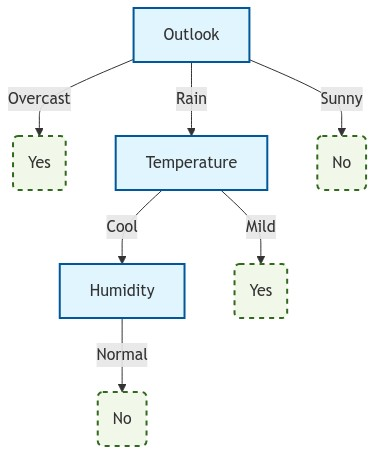

## Split the data  

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Split data to train and test
X_train_one_hot, X_test_one_hot, y_train_one_hot, y_test_one_hot = train_test_split(X_one_hot, y_one_hot, test_size=0.3, random_state=42)
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)
X_train_encoded2, X_test_encoded2, y_train_encoded2, y_test_encoded2 = train_test_split(X_encoded2, y_encoded2, test_size=0.3, random_state=42)

In [39]:
train_one_hot = pd.concat([X_train_one_hot, y_train_one_hot], axis=1)
train_encoded = pd.concat([X_train_encoded, y_train_encoded], axis=1)
train_encoded2 = pd.concat([X_train_encoded2, y_train_encoded2], axis=1)

In [40]:
print(train_one_hot.shape)
train_one_hot.head()

(22792, 102)


,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,...,age_group_51+,hours_per_week_group_Full-time,hours_per_week_group_Overtime,capital_gain_group_Low Gain,capital_gain_group_Medium Gain,capital_gain_group_High Gain,capital_loss_group_Low Loss,capital_loss_group_Medium Loss,capital_loss_group_High Loss,salary
19749,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1216,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
27962,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23077,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
10180,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
print(train_encoded.shape)
train_encoded.head()

(22792, 13)


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age_group,hours_per_week_group,capital_gain_group,capital_loss_group,salary
19749,5,11,2,4,5,4,0,38,1,2,3,0,0
1216,5,15,2,2,0,0,1,38,1,0,2,3,1
27962,6,15,2,9,0,4,1,38,0,2,3,3,0
23077,1,11,0,3,1,4,0,38,2,0,3,3,0
10180,3,1,4,8,3,4,0,38,0,2,3,3,0


In [42]:
print(train_encoded['salary'].unique())

[0 1]


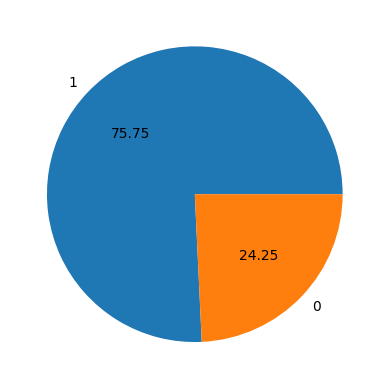

In [114]:
labels = ["1", "0"]
colors = ['#1f77b4', '#ff7f0e']

# Convert the groupby result to array format
plt.pie(train_encoded.groupby(['salary']).size().values, labels=labels, colors=colors, autopct='%0.02f')
plt.show()

In [98]:
# train_one_hot
features = list(train_one_hot.columns[:-1])
target = 'salary'
tree_train_one_hot = id3(train_one_hot, train_one_hot, features, target, parent_node_class=None)
pprint.pprint(tree_train_one_hot)
ID3Visualizer.save_diagram(tree_train_one_hot, 'tree_train_one_hot.png')

KeyboardInterrupt: 

In [43]:
# train_encoded
features = list(train_encoded.columns[:-1])
target = 'salary'
tree_train_encoded = id3(train_encoded, train_encoded, features, target, parent_node_class=None)
pprint.pprint(tree_train_encoded)
ID3Visualizer.save_diagram(tree_train_encoded, 'tree_train_encoded.png')

{'relationship': {0: {'education': {0.0: {'capital_loss_group': {2.0: 1.0,
                                                                 3.0: {'occupation': {0.0: 0.0,
                                                                                      2.0: {'workclass': {0.0: 0.0,
                                                                                                          1.0: 0.0,
                                                                                                          3.0: {'age_group': {0.0: 0.0,
                                                                                                                              1.0: {'hours_per_week_group': {0.0: {'race': {2.0: 0.0,
                                                                                                                                                                            4.0: {'marital-status': {2.0: {'sex': {1.0: {'native-country': {38.0: {'capital_gain_group': {3.0: 0.0}}}}}

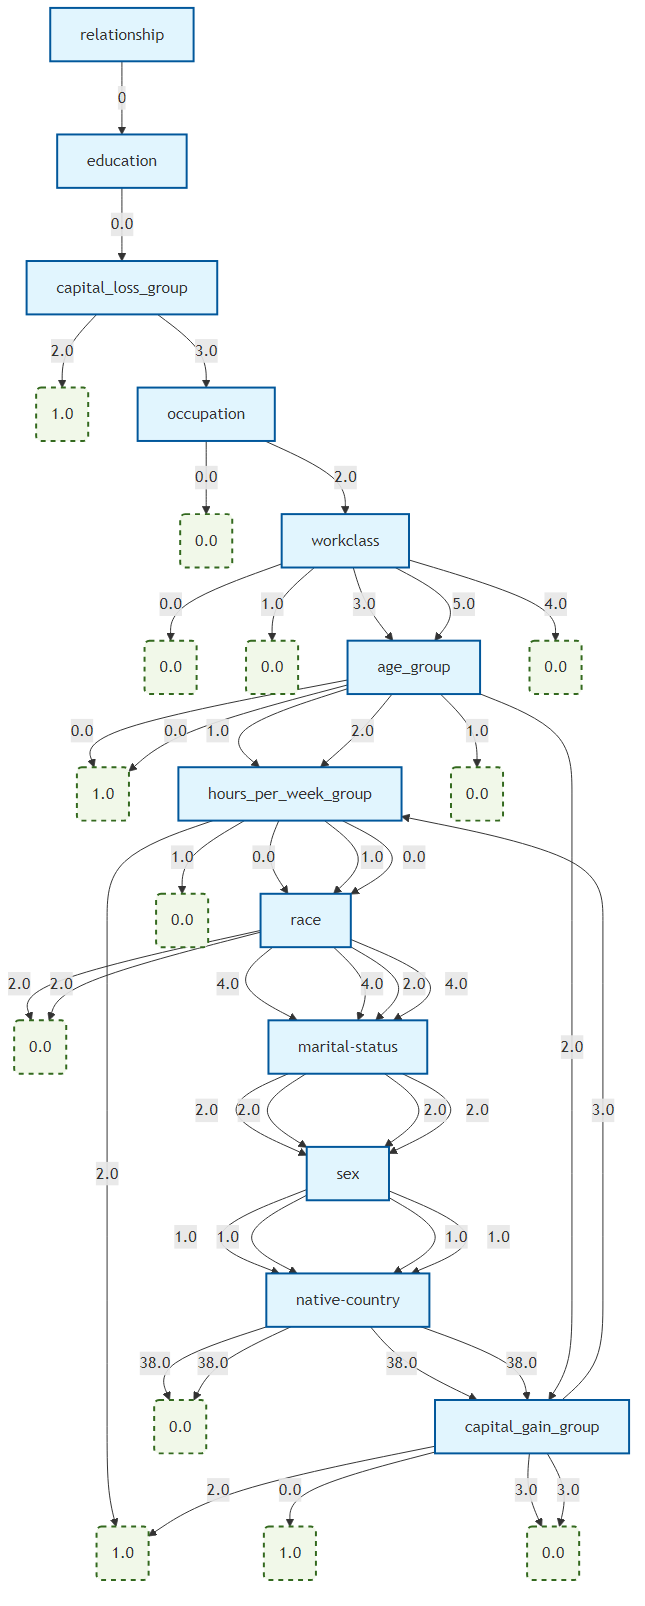

In [95]:
# train_encoded
features2 = list(train_encoded2.columns[:-1])
target2 = 'salary'
tree_train_encoded2 = id3(train_encoded2, train_encoded2, features2, target2, parent_node_class=None)
pprint.pprint(tree_train_encoded2)
ID3Visualizer.save_diagram(tree_train_encoded2, 'tree_train_encoded.png')

{'relationship': {0: {'education': {0.0: {'capital_loss_group': {2.0: 1.0,
                                                                 3.0: {'occupation': {0.0: 0.0,
                                                                                      2.0: {'workclass': {0.0: 0.0,
                                                                                                          1.0: 0.0,
                                                                                                          3.0: {'age_group': {0.0: 0.0,
                                                                                                                              1.0: {'hours_per_week_group': {0.0: {'race': {2.0: 0.0,
                                                                                                                                                                            4.0: {'marital-status': {2.0: {'sex': {1.0: {'native-country': {38.0: {'capital_gain_group': {3.0: 0.0}}}}}

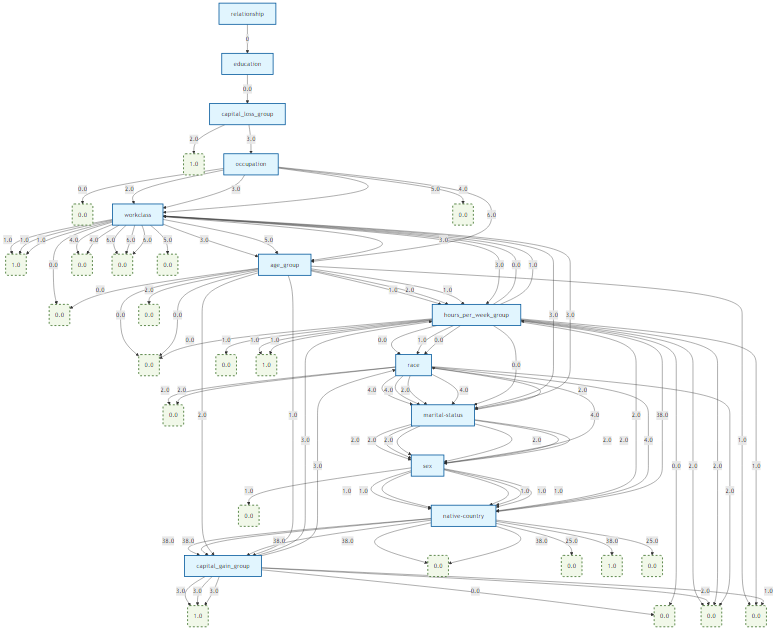

In [91]:
@staticmethod
def save_diagram(tree: Dict, output_file: str = 'decision_tree.png') -> None:
    diagram_code = ID3Visualizer.create_diagram(tree)
    with open('tree_diagram2.mmd', 'w') as file:
        file.write(diagram_code)
    print("Diagram saved as tree_diagram.mmd. Use Mermaid CLI to convert it to an image.")
save_diagram(tree_train_encoded, 'tree_train_encoded.png')

Diagram saved as tree_diagram.mmd. Use Mermaid CLI to convert it to an image.


In [92]:
save_diagram(tree_train_encoded2, 'tree_train_encoded2.png')

Diagram saved as tree_diagram.mmd. Use Mermaid CLI to convert it to an image.


### predict 🎲

In [19]:
def predict(tree, instance):
    if isinstance(tree, (int, float, str)):
        return tree

    for attribute, branches in tree.items():
        attribute_value = instance.get(attribute)
        if attribute_value in branches:
            subtree = branches[attribute_value]
            return predict(subtree, instance)

    # If no matching branch is found, return None
    return None

### evaluate 🧷✔💲

In [20]:
def evaluate(tree, test_data, label):
    y_true = test_data[label].values
    y_pred = []
    total_predictions = len(test_data)

    for i in range(total_predictions):
        instance = test_data.iloc[i].to_dict()
        prediction = predict(tree, instance)
        y_pred.append(prediction)

    y_pred = np.array(y_pred)

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    conf_matrix = np.array([[TN, FP], [FN, TP]])
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

    return {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

In [50]:
def tree_height(tree):
    if isinstance(tree, dict):
        if not tree:
            return 0
        heights = [tree_height(subtree) for subtree in tree.values()]
        return 1 + max(heights)
    else:
        return 0

# Test

In [56]:
test_one_hot = pd.concat([X_test_one_hot, y_test_one_hot], axis=1)
test_encoded = pd.concat([X_test_encoded, y_test_encoded], axis=1)
test_encoded2 = pd.concat([X_test_encoded2, y_test_encoded2], axis=1)

## encoded data

In [58]:
type(tree_train_encoded)

dict

In [65]:
tree_height(tree_train_encoded)

24

In [88]:
evaluate_encoded = evaluate(tree_train_encoded, test_encoded, 'salary')

Accuracy: 0.8323379783233797
Confusion Matrix:
 [[6363  590]
 [ 926 1163]]
Precision: 0.6634341129492299
Recall: 0.5567257060794638
F1-Score: 0.6054138469547111


# encoded 2

In [96]:
tree_height(tree_train_encoded2)

24

In [97]:
evaluate_encoded2 = evaluate(tree_train_encoded2, test_encoded2, 'salary')

Accuracy: 0.8323379783233797
Confusion Matrix:
 [[6363  590]
 [ 926 1163]]
Precision: 0.6634341129492299
Recall: 0.5567257060794638
F1-Score: 0.6054138469547111


# feature selection before training model

<Axes: title={'center': 'Correlation with salary Condition'}>

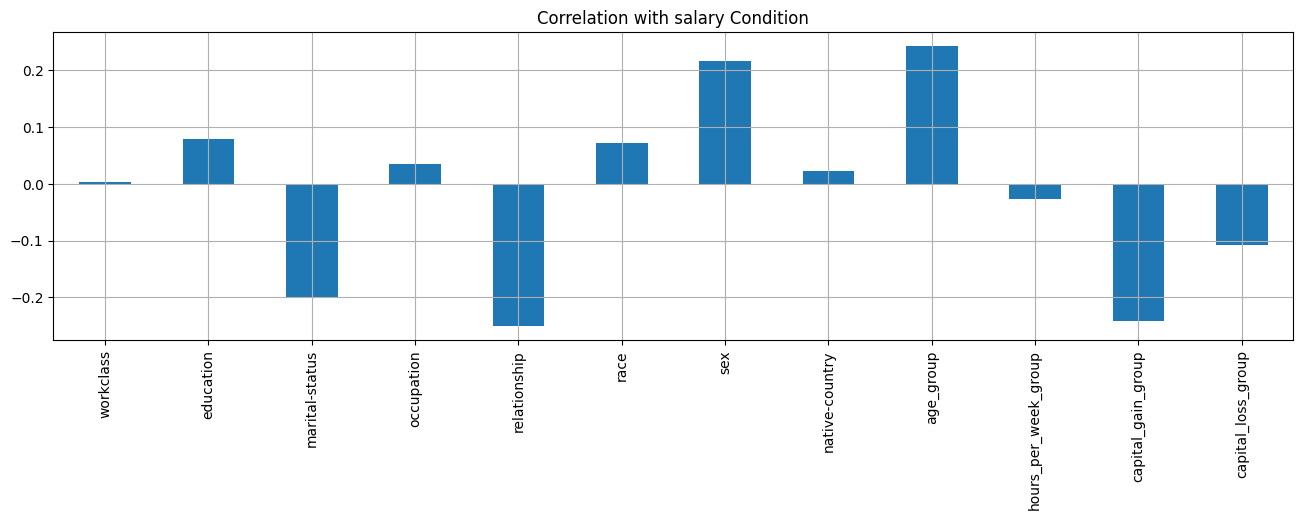

In [117]:
encoded_data.drop('salary', axis=1).corrwith(encoded_data['salary']).plot(kind='bar', grid=True, figsize=(16, 4), title="Correlation with salary Condition", color='#1f77b4')


important features: relationshop, martial_status , sex , age_group, capital_gain_group

In [119]:
subset1 = encoded_data.copy()

In [122]:
subset_1 = subset1[["relationship", "marital-status" , "sex" , "age_group", "capital_gain_group", "salary"]]

In [123]:
subset_1.head()

,relationship,marital-status,sex,age_group,capital_gain_group,salary
0,1,4,1,1,1,0
1,0,2,1,1,3,0
2,1,0,1,1,3,0
3,0,2,1,2,3,0
4,5,2,0,0,3,0


In [124]:
X_subset_1 = subset_1.drop('salary', axis=1)
y_subset_1 = subset_1['salary']
X_train_subset_1, X_test_subset_1, y_train_subset_1, y_test_subset_1 = train_test_split(X_subset_1, y_subset_1, test_size=0.3, random_state=42)
train_subset_1 = pd.concat([X_train_subset_1, y_train_subset_1], axis=1)
test_subset_1 = pd.concat([X_test_subset_1, y_test_subset_1], axis=1)

In [145]:
# train_encoded
features_subset_1 = list(subset_1.columns[:-1])
target_subset_1 = 'salary'
tree_train_subset_1 = id3(train_subset_1, train_subset_1, features_subset_1, target_subset_1, parent_node_class=None)
ID3Visualizer.save_diagram(tree_train_subset_1, 'tree_train_subset_1.png')

Failed to download the image. Status code: 414


In [131]:
@staticmethod
def save_diagram(tree: Dict, output_file: str = 'decision_tree.png') -> None:
    diagram_code = ID3Visualizer.create_diagram(tree)
    with open('tree_train_subset_1.mmd', 'w') as file:
        file.write(diagram_code)
    print("Diagram saved as tree_train_subset_1.mmd. Use Mermaid CLI to convert it to an image.")
save_diagram(tree_train_subset_1, 'tree_train_subset_1.png')

Diagram saved as tree_train_subset_1.mmd. Use Mermaid CLI to convert it to an image.


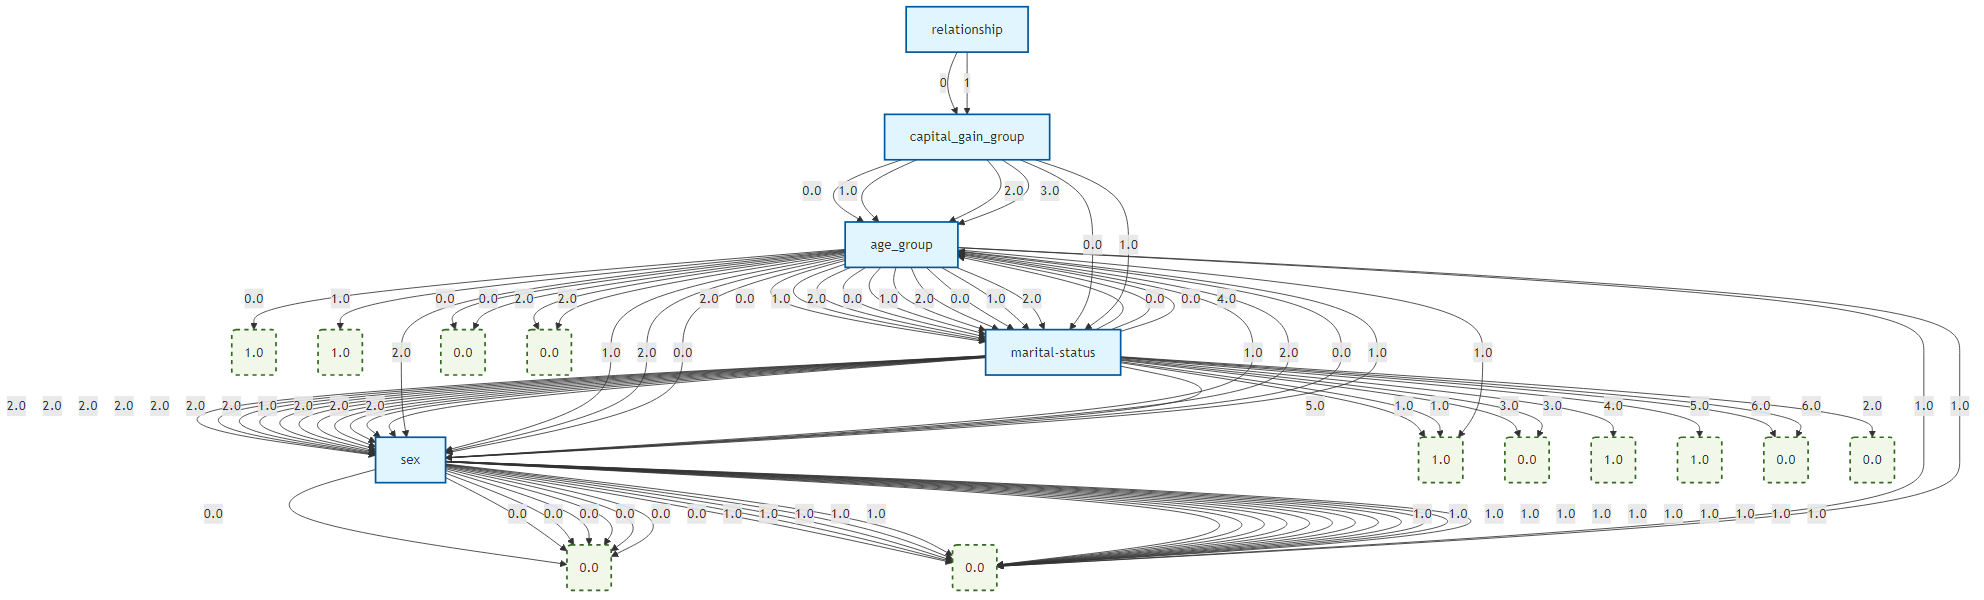

In [146]:
tree_height(tree_train_subset_1)

10

In [147]:
evaluate_subset1 = evaluate(tree_train_subset_1, test_subset_1, 'salary')

Accuracy: 0.8051854888296782
Confusion Matrix:
 [[7285  164]
 [1737  572]]
Precision: 0.7771739130434783
Recall: 0.24772628843655262
F1-Score: 0.3756978653530378


### random subset of features

In [142]:
import random
randomset = encoded_data.copy()
num_features = 5
features_without_salary = [col for col in randomset.columns.tolist() if col != 'salary']
subset_random_features = random.sample(features_without_salary, num_features)
subset_random = subset_random_features + ['salary']
print(subset_random)
s_random = randomset[subset_random]
s_random

['hours_per_week_group', 'workclass', 'relationship', 'marital-status', 'capital_loss_group', 'salary']


,hours_per_week_group,workclass,relationship,marital-status,capital_loss_group,salary
0,0,6,1,4,3,0
1,2,5,0,2,3,0
2,0,3,1,0,3,0
3,0,3,0,2,3,0
4,0,3,5,2,3,0
...,...,...,...,...,...,...
32556,0,3,5,2,3,0
32557,0,3,0,2,3,1
32558,0,3,4,6,3,0
32559,2,3,3,4,3,0


In [144]:
X_subset_random = s_random.drop('salary', axis=1)
y_subset_random = s_random['salary']
X_train_subset_random, X_test_subset_random, y_train_subset_random, y_test_subset_random = train_test_split(X_subset_random, y_subset_random, test_size=0.3, random_state=42)
train_subset_random = pd.concat([X_train_subset_random, y_train_subset_random], axis=1)
test_subset_random = pd.concat([X_test_subset_random, y_test_subset_random], axis=1)

In [148]:
# train_encoded
features_r = list(train_subset_random .columns[:-1])
target_r = 'salary'
tree_train_r = id3(train_subset_random , train_subset_random , features_r, target_r, parent_node_class=None)

In [149]:
tree_height(tree_train_r)

10

In [156]:
evaluate_r = evaluate(tree_train_r, test_subset_random, 'salary')

Accuracy: 0.7957695861998152
Confusion Matrix:
 [[6697  734]
 [1255 1053]]
Precision: 0.5892557358701734
Recall: 0.4562391681109185
F1-Score: 0.5142857142857142


## balancing data

In [41]:
copy_data = encoded_data.copy()

In [42]:
from sklearn.utils import resample

# Separate classes
class_0 = copy_data[copy_data['salary'] == 0]
class_1 = copy_data[copy_data['salary'] == 1]

In [44]:
class_1_upsampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)
balanced_data = pd.concat([class_0, class_1_upsampled])

print("After upsampling:", balanced_data.shape)

After upsampling: (49440, 13)


In [45]:
balanced_data

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary,age_group,hours_per_week_group,capital_gain_group,capital_loss_group
0,6,9,4,0,1,4,1,38,0,1,0,1,3
1,5,9,2,3,0,4,1,38,0,1,2,3,3
2,3,11,0,5,1,4,1,38,0,1,0,3,3
3,3,1,2,5,0,2,1,38,0,2,0,3,3
4,3,9,2,9,5,2,0,4,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20610,3,12,2,9,5,4,0,38,1,2,0,3,3
31293,3,11,2,3,0,4,1,38,1,2,0,3,3
27641,6,12,2,9,0,4,1,38,1,1,1,3,3
30815,5,9,0,4,1,4,1,38,1,2,1,0,3


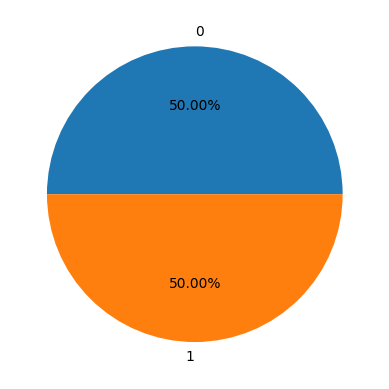

In [46]:
unique_labels = balanced_data['salary'].unique()
counts = balanced_data['salary'].value_counts()
colors = ['#1f77b4', '#ff7f0e'][:len(unique_labels)]

# Plot the pie chart
plt.pie(counts.values, labels=unique_labels, colors=colors, autopct='%0.2f%%')
plt.show()

In [47]:
X_b = balanced_data.drop('salary', axis=1)
y_b= balanced_data['salary']
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.3, random_state=42)
train_balance = pd.concat([X_train_b, y_train_b], axis=1)
test_balance = pd.concat([X_test_b, y_test_b], axis=1)

In [48]:
# train_encoded
features_b = list(train_balance .columns[:-1])
target_b = 'salary'
tree_train_b = id3(train_balance , train_balance , features_b, target_b, parent_node_class=None)

In [51]:
tree_height(tree_train_b)

24

In [52]:
evaluate_b = evaluate(tree_train_b, test_balance, 'salary')

Accuracy: 0.8721788652183083
Confusion Matrix:
 [[5592 1223]
 [ 595 6813]]
Precision: 0.8478098556495769
Recall: 0.9196814254859611
F1-Score: 0.8822843822843822
